<a href="https://colab.research.google.com/github/PuruBhatnagar1197/Machine-Learning-Revision/blob/main/Gradient_boost_algo_step_by_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [3]:
df=pd.DataFrame()
df['X']=X.reshape(100)
df['y']=y

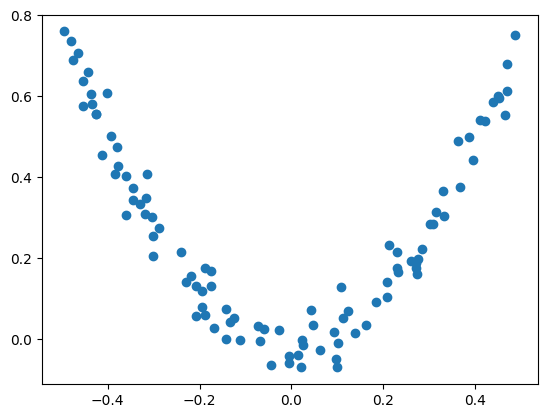

In [4]:
plt.scatter(df['X'],df['y'])

In [5]:
df['pred1']=df['y'].mean()
df['res1']=df['y']-df['pred1']

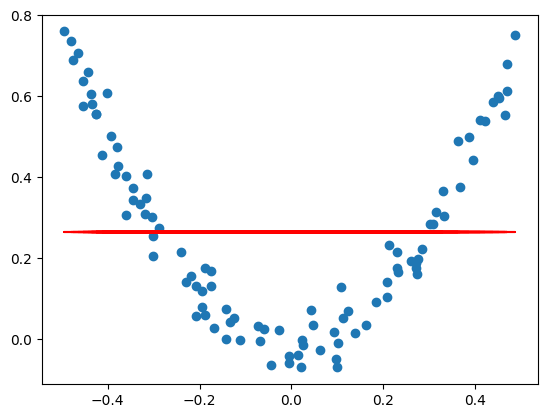

In [6]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [7]:
from sklearn.tree import DecisionTreeRegressor
clf_1=DecisionTreeRegressor(max_leaf_nodes=8)### in gradient boost we have max_leaf_node for tree between 8 to 32

In [8]:
clf_1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [9]:
#### trail how does it looks like
X_test = np.linspace(-0.5, 0.5, 500)
pred_2=0.26545839669679816+(clf_1.predict(X_test.reshape(500,1)))

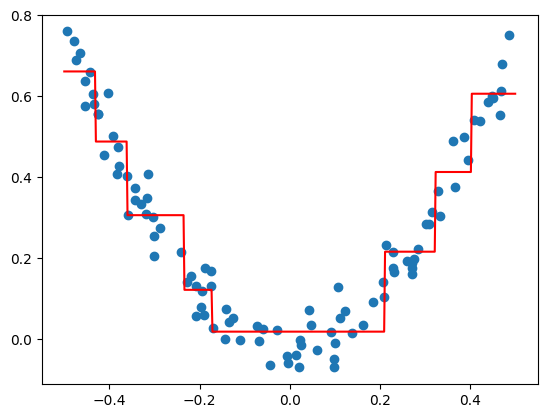

In [10]:
plt.plot(X_test,pred_2,color='red')
plt.scatter(df['X'],df['y'])

In [11]:
### now calculating pred_2 for dataset
df['pred2']=df['pred1']+clf_1.predict(df[['X']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [12]:
### cal residual 2
df['res2']=df['y']-df['pred2']

In [13]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018320,-0.058995
96,0.022733,-0.002305,0.265458,-0.267763,0.018320,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018320,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028603


In [14]:
### now follow the above steps for further trees
clf_2=DecisionTreeRegressor(max_leaf_nodes=8)

In [15]:
clf_2.fit(df['X'].values.reshape(100,1),df['res2'])

DecisionTreeRegressor(max_leaf_nodes=8)

In [16]:
y_pred=0.26545839669679816+sum(j.predict(X_test.reshape(-1,1)) for j in [clf_1,clf_2])

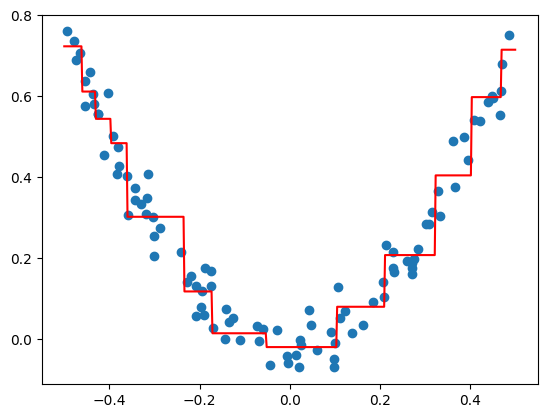

In [17]:
plt.plot(X_test,y_pred,color='red')
plt.scatter(df['X'],df['y'])

In [20]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return
  else:
    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)



5


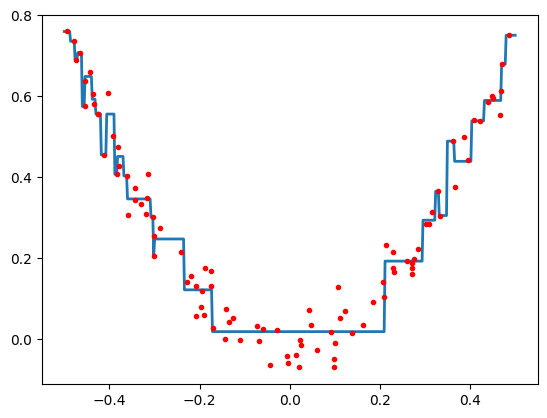

4


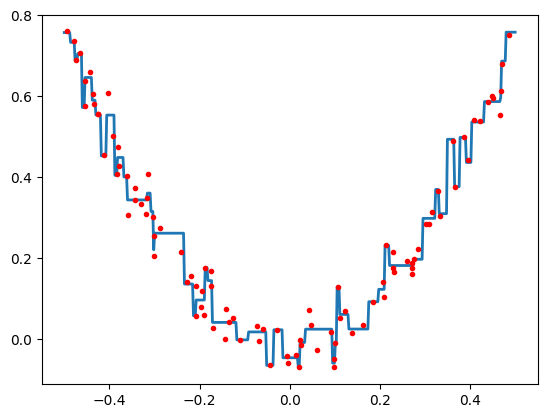

3


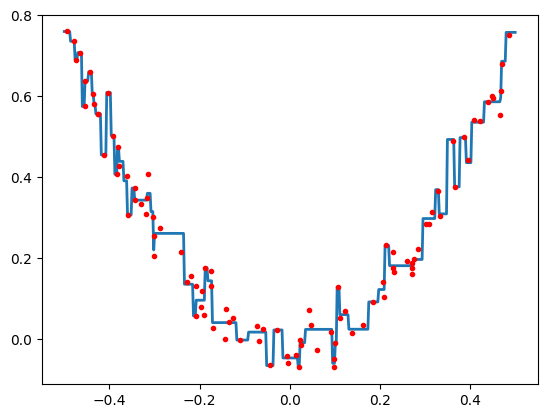

2


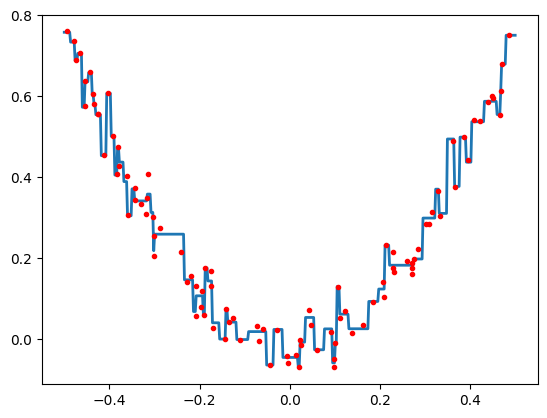

1


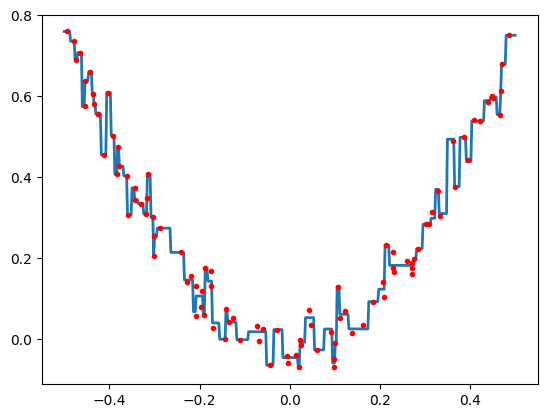

In [21]:

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)
